<a href="https://colab.research.google.com/github/syaoraaann/heart_failure_data_mining/blob/main/DESCRIPTIVE_DATA_MINING_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
print("Duplikat sebelum pembersihan:")
print(df.duplicated().sum())

Duplikat sebelum pembersihan:
0


In [ ]:
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang per kolom:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
# Class distribution
class_distribution = df['DEATH_EVENT'].value_counts()
class_distribution

,count
DEATH_EVENT,
0,203
1,96


In [ ]:
# melihat deskripsi statistik dasar data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#lakukan cleaning untuk nilai yang tidak valid (N/A)
df.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
# melihat korelasi antar variable terhadap Outcome (target)
correlation = df.corr()
correlation

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
# menemukan variable yang paling berpengaruh pada Outcome (target)
correlation.sort_values("DEATH_EVENT", ascending=False)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
DEATH_EVENT,0.253729,0.066270,0.062728,-0.001943,-0.268603,0.079351,-0.049139,0.294278,-0.195204,-0.004316,-0.012623,-0.526964,1.000000
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316
smoking,0.018668,-0.107290,0.002421,-0.147173,-0.067315,-0.055711,0.028234,-0.027414,0.004813,0.445892,1.000000,-0.022839,-0.012623
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139


<Axes: >

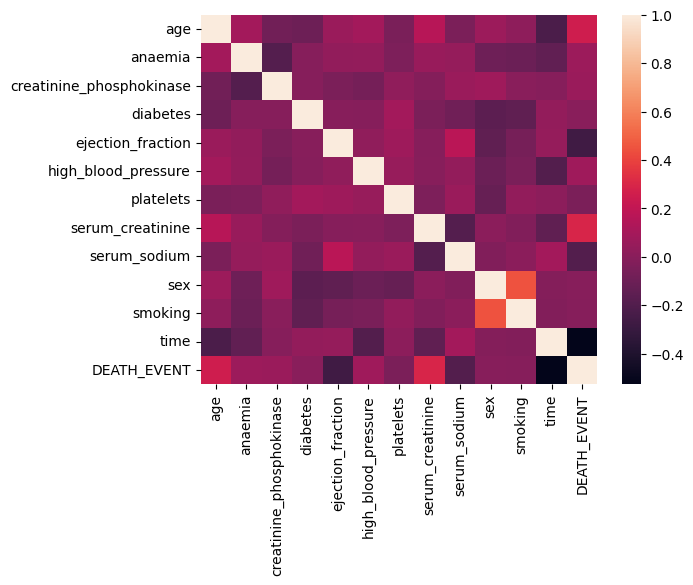

In [ ]:
# menampilkan secara visual korelasi variabel
sn.heatmap(correlation)

In [ ]:
df_selected = df
df_selected

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<Axes: xlabel='age'>

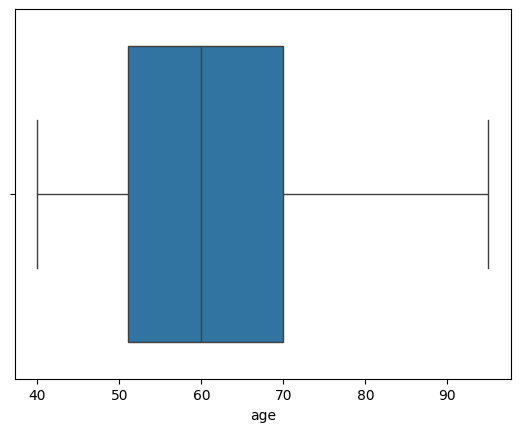

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'age', data = df)

<Axes: xlabel='anaemia'>

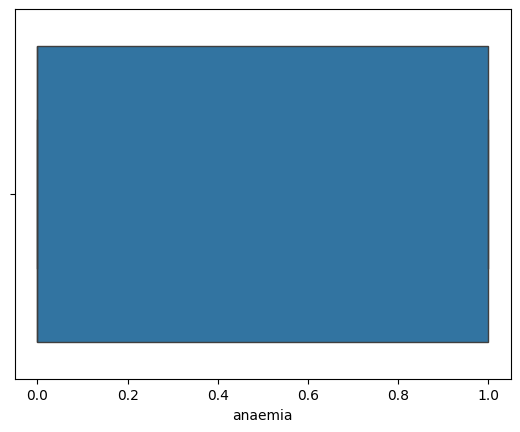

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'anaemia', data = df)

<Axes: xlabel='creatinine_phosphokinase'>

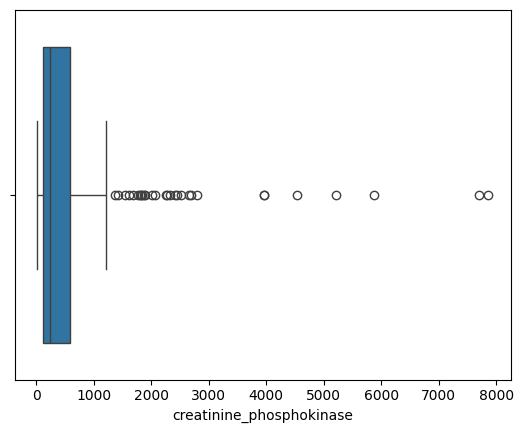

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'creatinine_phosphokinase', data = df)

<Axes: xlabel='diabetes'>

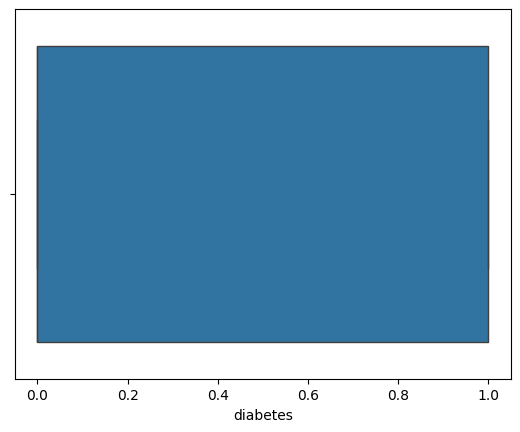

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'diabetes', data = df)

<Axes: xlabel='ejection_fraction'>

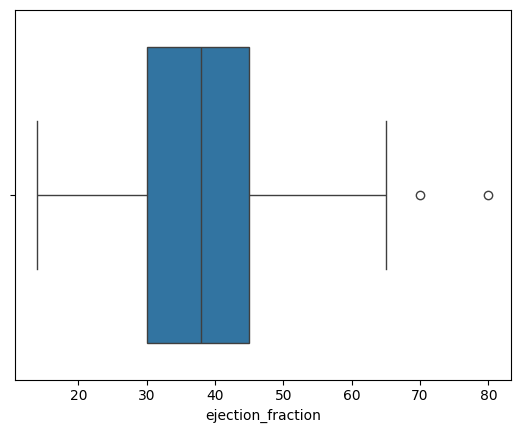

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'ejection_fraction', data = df)

<Axes: xlabel='high_blood_pressure'>

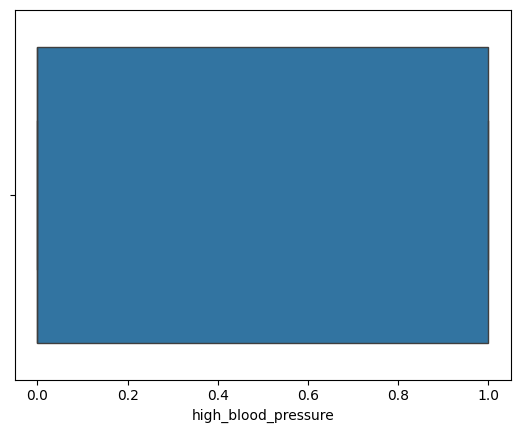

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'high_blood_pressure', data = df)

<Axes: xlabel='platelets'>

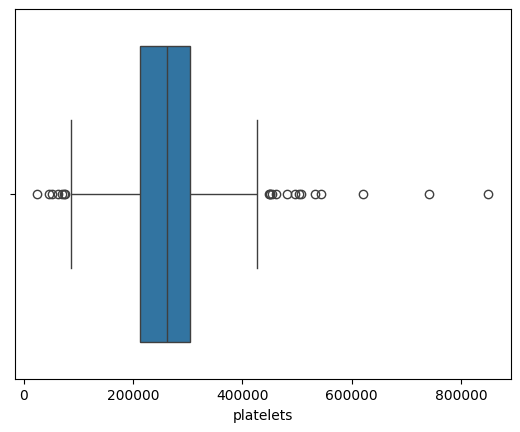

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'platelets', data = df)

<Axes: xlabel='serum_creatinine'>

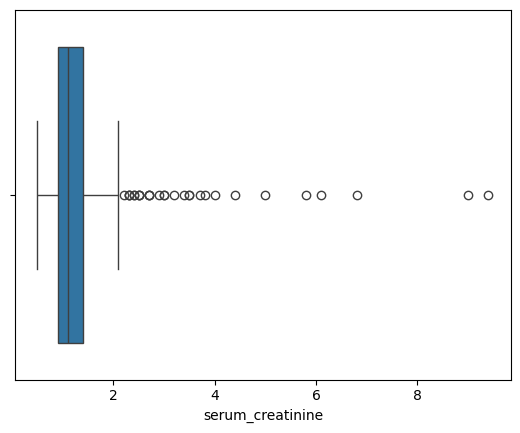

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'serum_creatinine', data = df)

<Axes: xlabel='serum_sodium'>

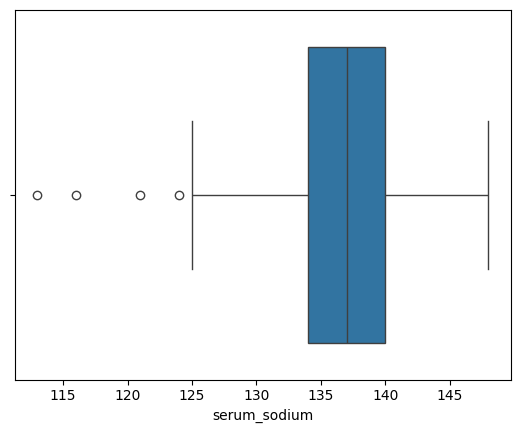

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'serum_sodium', data = df)

<Axes: xlabel='sex'>

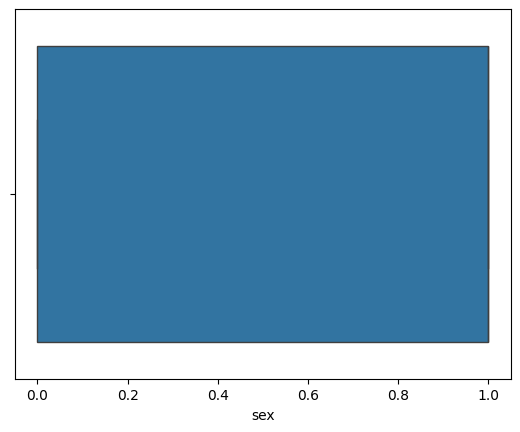

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'sex', data = df)

<Axes: xlabel='smoking'>

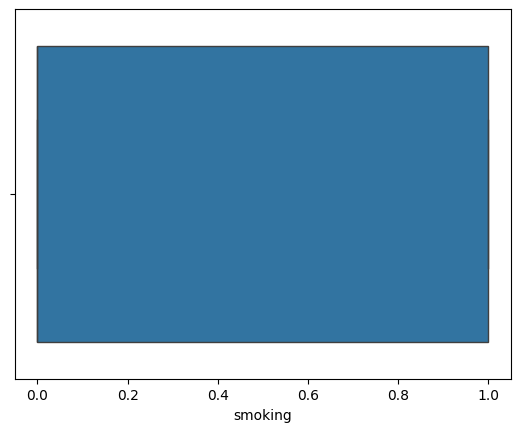

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'smoking', data = df)

<Axes: xlabel='time'>

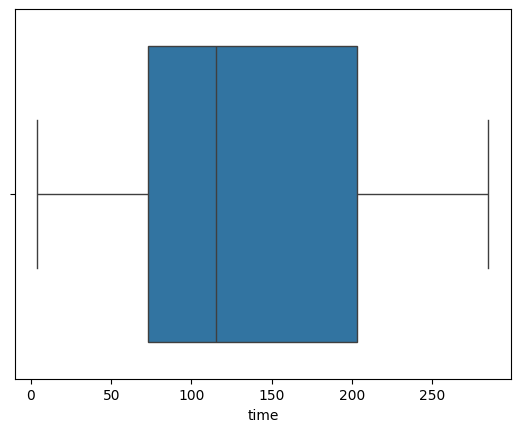

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'time', data = df)

<Axes: xlabel='DEATH_EVENT'>

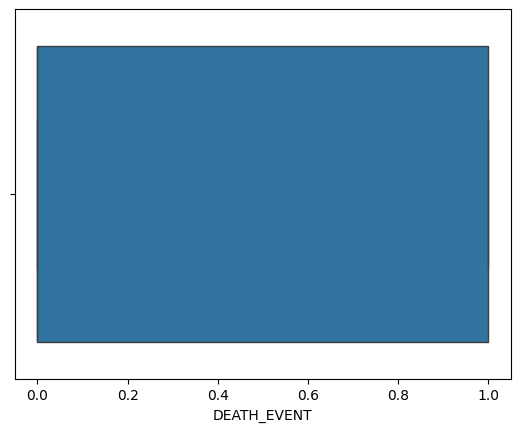

In [ ]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'DEATH_EVENT', data = df)

In [ ]:
def detect_outlier(column_name):
  q1, q3 = np.percentile(df[column_name], [25,75])
  iqr = q3 - q1

  lower_bound = q1 -(1.5 * iqr)
  upper_bound = q3 +(1.5 * iqr)
  return lower_bound, upper_bound

In [ ]:
#detect_outlier for column 'Pregnancies'
lower_creatinine_phosphokinase, upper_creatinine_phosphokinase = detect_outlier('creatinine_phosphokinase')
lower_creatinine_phosphokinase, upper_creatinine_phosphokinase
df_creatinine_phosphokinase = df[(df['creatinine_phosphokinase'] < lower_creatinine_phosphokinase)|(df['creatinine_phosphokinase']>upper_creatinine_phosphokinase)]
df_creatinine_phosphokinase

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
38,60.0,0,2656,1,30,0,305000.00,2.30,137,1,0,30,0
46,51.0,0,1380,0,25,1,271000.00,0.90,130,1,0,38,1
52,60.0,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
60,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60,1
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72,1
103,42.0,0,5209,0,30,0,226000.00,1.00,140,1,1,87,0
107,45.0,1,1876,1,35,0,226000.00,0.90,138,1,0,88,0
130,53.0,1,1808,0,60,1,249000.00,0.70,138,1,1,106,0
134,81.0,0,4540,0,35,0,231000.00,1.18,137,1,1,107,0


In [ ]:
lower_ejection_fraction, upper_ejection_fraction = detect_outlier('ejection_fraction')
lower_ejection_fraction, upper_ejection_fraction
df_ejection_fraction = df[(df['ejection_fraction'] < lower_ejection_fraction)|(df['ejection_fraction']>upper_ejection_fraction)]
df_ejection_fraction

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [ ]:
lower_platelets, upper_platelets = detect_outlier('platelets')
lower_platelets, upper_platelets
df_platelets = df[(df['platelets'] < lower_platelets)|(df['platelets']>upper_platelets)]
df_platelets

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
7,60.0,1,315,1,60,0,454000.0,1.10,131,1,1,10,1
15,82.0,1,379,0,50,0,47000.0,1.30,136,1,0,13,1
47,60.0,0,582,1,38,1,451000.0,0.60,138,1,1,40,1
55,95.0,1,371,0,30,0,461000.0,2.00,132,1,0,50,1
69,65.0,0,113,1,25,0,497000.0,1.83,135,1,0,67,1
105,72.0,1,328,0,30,1,621000.0,1.70,138,0,1,88,1
109,45.0,0,292,1,35,0,850000.0,1.30,142,1,1,88,0
117,85.0,1,102,0,60,0,507000.0,3.20,138,0,0,94,0
162,63.0,1,582,0,40,0,448000.0,0.90,137,1,1,123,0
163,50.0,1,2334,1,35,0,75000.0,0.90,142,0,0,126,1


In [ ]:
lower_serum_creatinine, upper_serum_creatinine = detect_outlier('serum_creatinine')
lower_serum_creatinine, upper_serum_creatinine
df_serum_creatinine = df[(df['serum_creatinine'] < lower_serum_creatinine)|(df['serum_creatinine']>upper_serum_creatinine)]
df_serum_creatinine

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.0,131,1,1,10,1
28,58.0,1,60,0,38,0,153000.00,5.8,134,1,0,26,1
31,85.0,0,23,0,45,0,360000.00,3.0,132,1,0,28,1
35,69.0,0,582,1,35,0,228000.00,3.5,134,1,0,30,1
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
39,60.0,0,235,1,38,0,329000.00,3.0,142,0,0,30,1
48,80.0,1,553,0,20,1,140000.00,4.4,133,1,0,41,1
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1


In [ ]:
lower_serum_sodium, upper_serum_sodium = detect_outlier('serum_sodium')
lower_serum_sodium, upper_serum_sodium
df_serum_sodium = df[(df['serum_sodium'] < lower_serum_sodium)|(df['serum_sodium']>upper_serum_sodium)]
df_serum_sodium

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
19,48.0,1,582,1,55,0,87000.00,1.9,121,0,0,15,1
126,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
199,60.0,0,1211,1,35,0,263358.03,1.8,113,1,1,186,0


In [ ]:
#get index data outlier 'Pregnancies'
dfi_creatinine_phosphokinase = df_creatinine_phosphokinase.index.tolist()
dfi_creatinine_phosphokinase

[1,
 38,
 46,
 52,
 60,
 72,
 103,
 107,
 130,
 134,
 139,
 147,
 149,
 153,
 163,
 164,
 171,
 176,
 187,
 200,
 208,
 227,
 246,
 250,
 280,
 283,
 295,
 296,
 297]

In [ ]:
#get index data outlier 'Pregnancies'
dfi_ejection_fraction = df_ejection_fraction.index.tolist()
dfi_ejection_fraction

[64, 217]

In [ ]:
#get index data outlier 'Pregnancies'
dfi_platelets = df_platelets.index.tolist()
dfi_platelets

[7,
 15,
 47,
 55,
 69,
 105,
 109,
 117,
 162,
 163,
 167,
 200,
 212,
 224,
 230,
 240,
 277,
 279,
 281,
 287,
 296]

In [ ]:
#get index data outlier 'Pregnancies'
dfi_serum_creatinine = df_serum_creatinine.index.tolist()
dfi_serum_creatinine

[4,
 9,
 10,
 28,
 31,
 35,
 38,
 39,
 48,
 52,
 54,
 56,
 61,
 65,
 82,
 104,
 117,
 124,
 129,
 131,
 150,
 167,
 183,
 203,
 217,
 228,
 247,
 281,
 282]

In [ ]:
#get index data outlier 'Pregnancies'
dfi_serum_sodium = df_serum_sodium.index.tolist()
dfi_serum_sodium

[4, 19, 126, 199]

In [ ]:
index_to_remove= list(set(dfi_creatinine_phosphokinase) | set(dfi_ejection_fraction) | set(dfi_platelets) | set(dfi_platelets) | set(dfi_serum_creatinine) | set(dfi_serum_sodium))
index_to_remove

[1,
 4,
 7,
 9,
 10,
 15,
 19,
 277,
 279,
 280,
 281,
 282,
 283,
 28,
 287,
 31,
 35,
 38,
 295,
 296,
 297,
 39,
 46,
 47,
 48,
 52,
 54,
 55,
 56,
 60,
 61,
 64,
 65,
 69,
 72,
 82,
 103,
 104,
 105,
 107,
 109,
 117,
 124,
 126,
 129,
 130,
 131,
 134,
 139,
 147,
 149,
 150,
 153,
 162,
 163,
 164,
 167,
 171,
 176,
 183,
 187,
 199,
 200,
 203,
 208,
 212,
 217,
 224,
 227,
 228,
 230,
 240,
 246,
 247,
 250]

In [ ]:
#data cleanned
df_cleaned = df_selected.drop(index_to_remove)
df_cleaned

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


In [ ]:
#transform data type to numeric
df_cleaned["DEATH_EVENT"] = pd.to_numeric(df["DEATH_EVENT"])

In [ ]:
# Setelah data di cleaned, record yang tersisa adalah 256 records
df_cleaned.to_csv("heart_failure_clinical_records_dataset_cleaned.csv")

In [ ]:
data = pd.read_csv("heart_failure_clinical_records_dataset_cleaned.csv", encoding="ISO-8859-1")
data

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
1,2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
2,3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
3,5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
4,6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
220,292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
221,293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
222,294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                224 non-null    int64  
 1   age                       224 non-null    float64
 2   anaemia                   224 non-null    int64  
 3   creatinine_phosphokinase  224 non-null    int64  
 4   diabetes                  224 non-null    int64  
 5   ejection_fraction         224 non-null    int64  
 6   high_blood_pressure       224 non-null    int64  
 7   platelets                 224 non-null    float64
 8   serum_creatinine          224 non-null    float64
 9   serum_sodium              224 non-null    int64  
 10  sex                       224 non-null    int64  
 11  smoking                   224 non-null    int64  
 12  time                      224 non-null    int64  
 13  DEATH_EVENT               224 non-null    int64  
dtypes: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

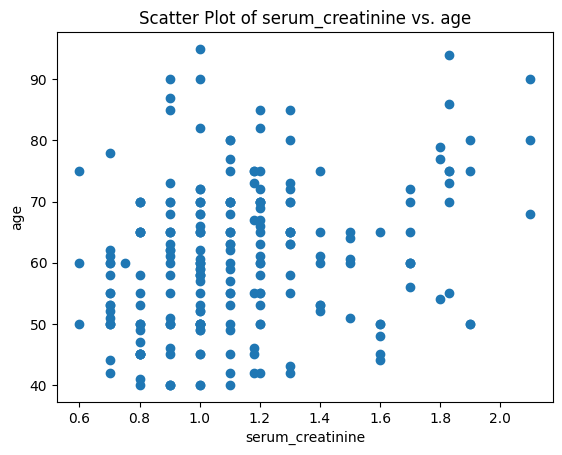

In [404]:
plt.scatter(data['serum_creatinine'], data['age'])
plt.xlabel('serum_creatinine')
plt.ylabel('age')
plt.title('Scatter Plot of serum_creatinine vs. age')
plt.show

In [405]:
X_train = data[['serum_creatinine', 'age']].values

In [406]:
X_train

array([[ 1.9  , 75.   ],
       [ 1.3  , 65.   ],
       [ 1.9  , 50.   ],
       [ 2.1  , 90.   ],
       [ 1.2  , 75.   ],
       [ 1.5  , 65.   ],
       [ 0.9  , 62.   ],
       [ 1.1  , 45.   ],
       [ 1.1  , 50.   ],
       [ 1.   , 49.   ],
       [ 0.9  , 87.   ],
       [ 0.8  , 45.   ],
       [ 1.   , 70.   ],
       [ 1.3  , 65.   ],
       [ 1.6  , 65.   ],
       [ 0.9  , 68.   ],
       [ 0.8  , 53.   ],
       [ 1.83 , 75.   ],
       [ 1.9  , 80.   ],
       [ 1.   , 95.   ],
       [ 1.3  , 70.   ],
       [ 1.2  , 82.   ],
       [ 1.83 , 94.   ],
       [ 1.   , 50.   ],
       [ 1.2  , 50.   ],
       [ 1.   , 65.   ],
       [ 1.   , 90.   ],
       [ 1.   , 82.   ],
       [ 1.83 , 70.   ],
       [ 1.2  , 50.   ],
       [ 1.2  , 70.   ],
       [ 1.   , 72.   ],
       [ 1.1  , 60.   ],
       [ 1.9  , 50.   ],
       [ 1.   , 57.   ],
       [ 1.   , 68.   ],
       [ 1.4  , 53.   ],
       [ 1.   , 70.   ],
       [ 0.6  , 60.   ],
       [ 1.1  , 49.   ],


In [407]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train

array([[ 1.9  , 75.   ],
       [ 1.3  , 65.   ],
       [ 1.9  , 50.   ],
       [ 2.1  , 90.   ],
       [ 1.2  , 75.   ],
       [ 1.5  , 65.   ],
       [ 0.9  , 62.   ],
       [ 1.1  , 45.   ],
       [ 1.1  , 50.   ],
       [ 1.   , 49.   ],
       [ 0.9  , 87.   ],
       [ 0.8  , 45.   ],
       [ 1.   , 70.   ],
       [ 1.3  , 65.   ],
       [ 1.6  , 65.   ],
       [ 0.9  , 68.   ],
       [ 0.8  , 53.   ],
       [ 1.83 , 75.   ],
       [ 1.9  , 80.   ],
       [ 1.   , 95.   ],
       [ 1.3  , 70.   ],
       [ 1.2  , 82.   ],
       [ 1.83 , 94.   ],
       [ 1.   , 50.   ],
       [ 1.2  , 50.   ],
       [ 1.   , 65.   ],
       [ 1.   , 90.   ],
       [ 1.   , 82.   ],
       [ 1.83 , 70.   ],
       [ 1.2  , 50.   ],
       [ 1.2  , 70.   ],
       [ 1.   , 72.   ],
       [ 1.1  , 60.   ],
       [ 1.9  , 50.   ],
       [ 1.   , 57.   ],
       [ 1.   , 68.   ],
       [ 1.4  , 53.   ],
       [ 1.   , 70.   ],
       [ 0.6  , 60.   ],
       [ 1.1  , 49.   ],


In [468]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=2)

In [469]:
y_cluster = kmeans.fit_predict(X_train)
y_cluster

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0], dtype=int32)

In [470]:
data['Cluster'] = y_cluster

In [471]:
data

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Cluster
0,0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1,1
1,2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1,1
2,3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1,0
3,5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1,1
4,6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0,1
220,292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0,0
221,293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0,1
222,294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0,1


In [472]:
kmeans.cluster_centers_

array([[ 1.0510101, 50.       ],
       [ 1.19     , 69.370672 ]])

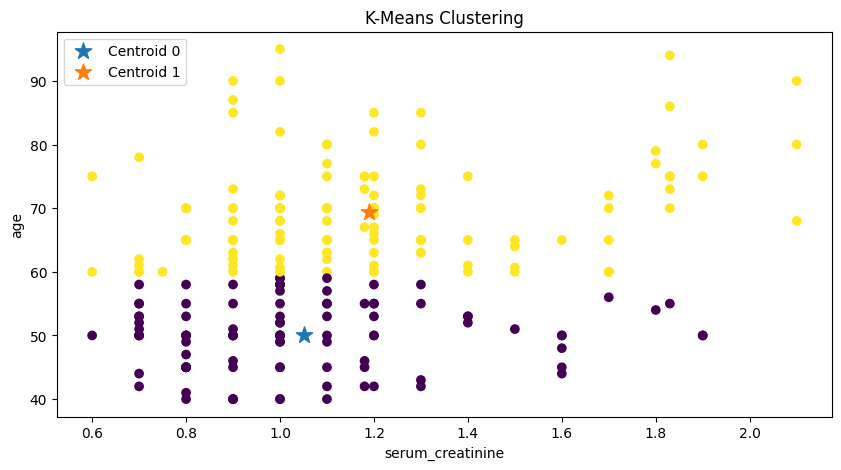

In [473]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:,0], X_train[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], marker='*', s=150, label='Centroid 0')
plt.scatter(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], marker='*', s=150, label='Centroid 1')
# plt.scatter(kmeans.cluster_centers_[3,0], kmeans.cluster_centers_[3,1], marker='*', s=150, label='Centroid 2')
plt.xlabel('serum_creatinine')
plt.ylabel('age')
plt.title('K-Means Clustering')
plt.legend()

In [474]:
inertias = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

In [475]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train, kmeans.labels_, metric='euclidean')

0.6160588133670798

In [476]:
inertias

[31848.05619069642,
 10817.921532090706,
 5406.810338428321,
 3120.787512336084,
 2357.597646099234,
 1761.5144369220784,
 1071.5458035777917,
 653.9773009651861,
 568.8681088335567]

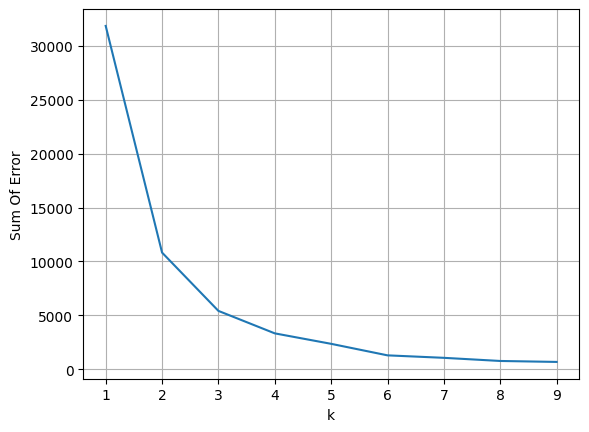

In [416]:
plt.xlabel("k")
plt.ylabel("Sum Of Error")
plt.plot(k_range, inertias)
plt.grid()

In [ ]:
data["Cluster"] = data["Cluster"].replace([0,1], ['Tidak Baik', 'Baik'])
data

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Cluster
0,0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1,Tidak Baik
1,2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1,Tidak Baik
2,3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1,Baik
3,5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1,Tidak Baik
4,6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1,Tidak Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0,Tidak Baik
220,292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0,Baik
221,293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0,Tidak Baik
222,294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0,Tidak Baik


In [ ]:
descriptive_stats = data.groupby('Cluster')[['serum_creatinine', 'age']].describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
           serum_creatinine                                               \
                      count     mean       std  min  25%  50%   75%  max   
Cluster                                                                    
Baik                   99.0  1.05101  0.295042  0.6  0.8  1.0  1.19  1.9   
Tidak Baik            125.0  1.19000  0.340339  0.6  1.0  1.1  1.30  2.1   

              age                                                     
            count       mean       std   min   25%   50%   75%   max  
Cluster                                                               
Baik         99.0  50.000000  5.385165  40.0  45.0  50.0  55.0  59.0  
Tidak Baik  125.0  69.370672  8.158067  60.0  63.0  68.0  73.0  95.0  


In [ ]:
death_event_analysis = data.groupby('Cluster')['DEATH_EVENT'].mean() * 100
print("\nDeath Event Analysis (Percentage of Deaths by Cluster):")
print(death_event_analysis)


Death Event Analysis (Percentage of Deaths by Cluster):
Cluster
Baik          19.191919
Tidak Baik    33.600000
Name: DEATH_EVENT, dtype: float64


In [ ]:
data.to_csv("heart_failure_clinical_records_dataset_clustered.csv")